[*********************100%***********************]  1 of 1 completed
Epoch 1/10
117/117 [==============================] - 8s 17ms/step - loss: 0.0093
Epoch 2/10
117/117 [==============================] - 2s 13ms/step - loss: 3.8605e-04
Epoch 3/10
117/117 [==============================] - 1s 9ms/step - loss: 3.7238e-04
Epoch 4/10
117/117 [==============================] - 1s 9ms/step - loss: 3.6860e-04
Epoch 5/10
117/117 [==============================] - 1s 9ms/step - loss: 3.6154e-04
Epoch 6/10
117/117 [==============================] - 1s 8ms/step - loss: 3.6961e-04
Epoch 7/10
117/117 [==============================] - 1s 9ms/step - loss: 3.4198e-04
Epoch 8/10
117/117 [==============================] - 1s 12ms/step - loss: 3.3678e-04
Epoch 9/10
117/117 [==============================] - 1s 11ms/step - loss: 3.4008e-04
Epoch 10/10
29/29 [==============================] - 1s 3ms/step - loss: 7.0344e-04
Pérdida en el conjunto de prueba: 0.0007034448208287358
29/29 [===================

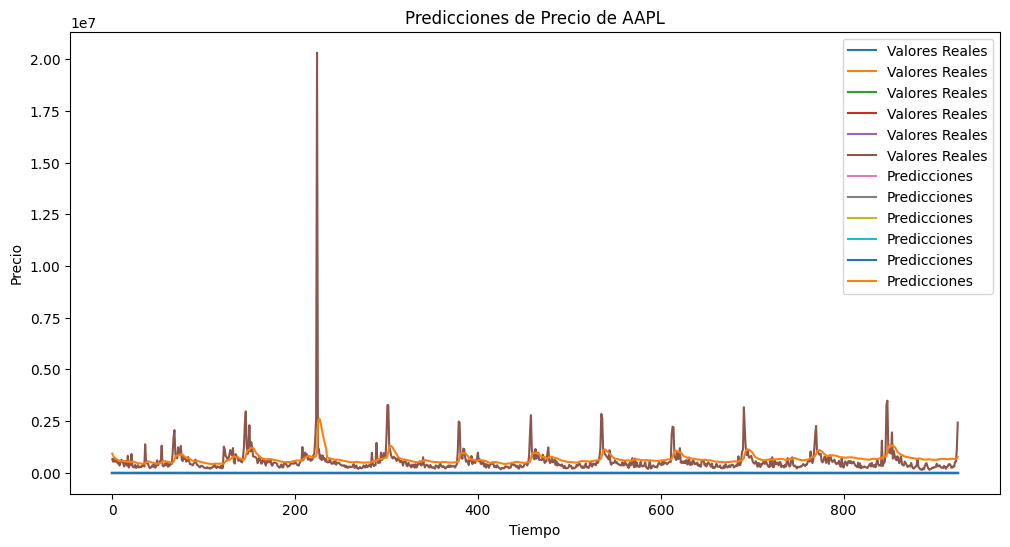

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Descargar datos de Yahoo Finance
data = yf.download('AAPL', period='60d', interval='5m')

# Preprocesamiento de datos
data['Datetime'] = data.index
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

# Escalado de los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Convertir los datos escalados en un DataFrame
df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(df) * 0.8)
train_data = df[:train_size].values
test_data = df[train_size:].values

# Crear secuencias de datos de entrada y salida
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Longitud de la secuencia de datos de entrada
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Construir el modelo de redes neuronales recurrentes (RNN)
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, df.shape[1]), return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(df.shape[1]))

# Compilar y entrenar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print("Pérdida en el conjunto de prueba:", loss)

# Realizar predicciones utilizando el modelo
predictions = model.predict(X_test)

# Invertir el escalado de los datos de prueba y las predicciones
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Visualizar las predicciones y los valores reales
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valores Reales')
plt.plot(predictions, label='Predicciones')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.title('Predicciones de Precio de AAPL')
plt.legend()
plt.show()
